<a href="https://colab.research.google.com/github/kiitaamuuraa/Asobiba/blob/main/torchvision_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## モジュールのインポートなど

In [40]:
%matplotlib inline

In [41]:
import torch 
import torchvision
from torchvision import transforms as transforms
import requests
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive, files

## 元画像

In [42]:
up = files.upload()
up.keys()
opan = Image.open('/content/E1GUZ2bXsAMwdzk.jpg')

Saving E1GUZ2bXsAMwdzk.jpg to E1GUZ2bXsAMwdzk (1).jpg


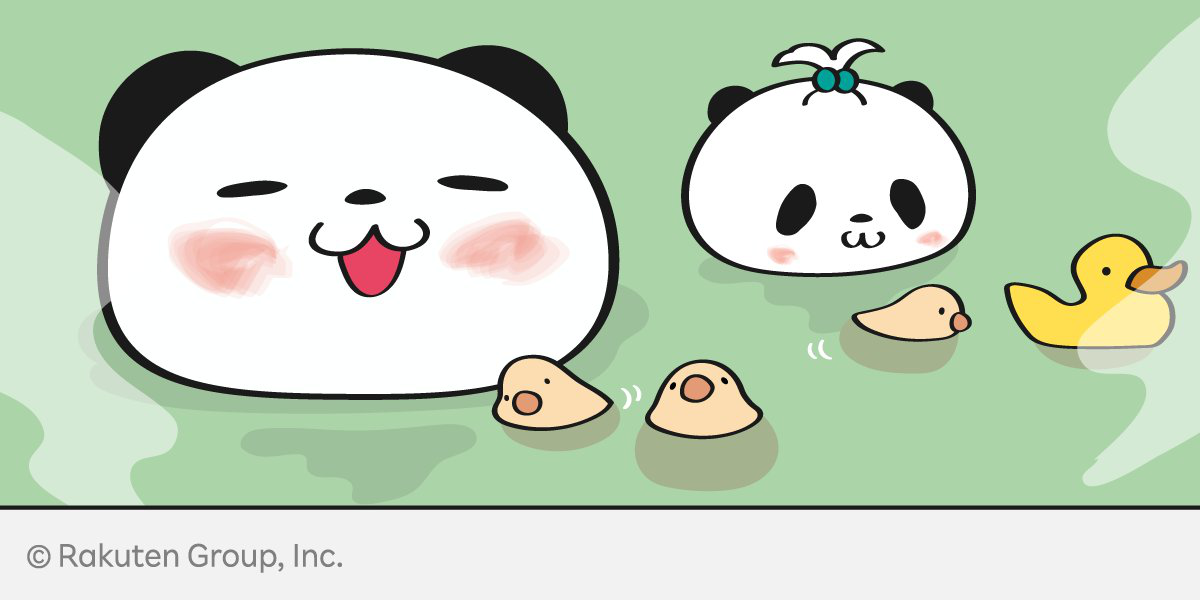

In [43]:
opan

## 色情報の変更(Photometric Distortions)




### グレースケール化

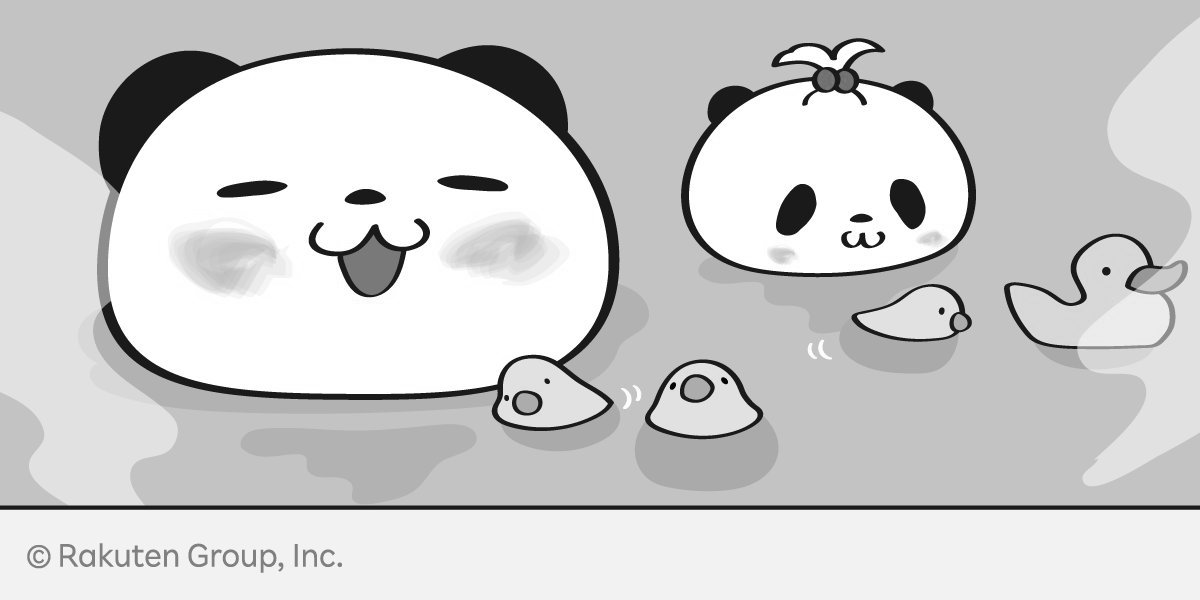

In [44]:
grayscale = transforms.Grayscale()
grayscaled_opan = grayscale(opan)
grayscaled_opan

### カラージッター

#### 明るさ

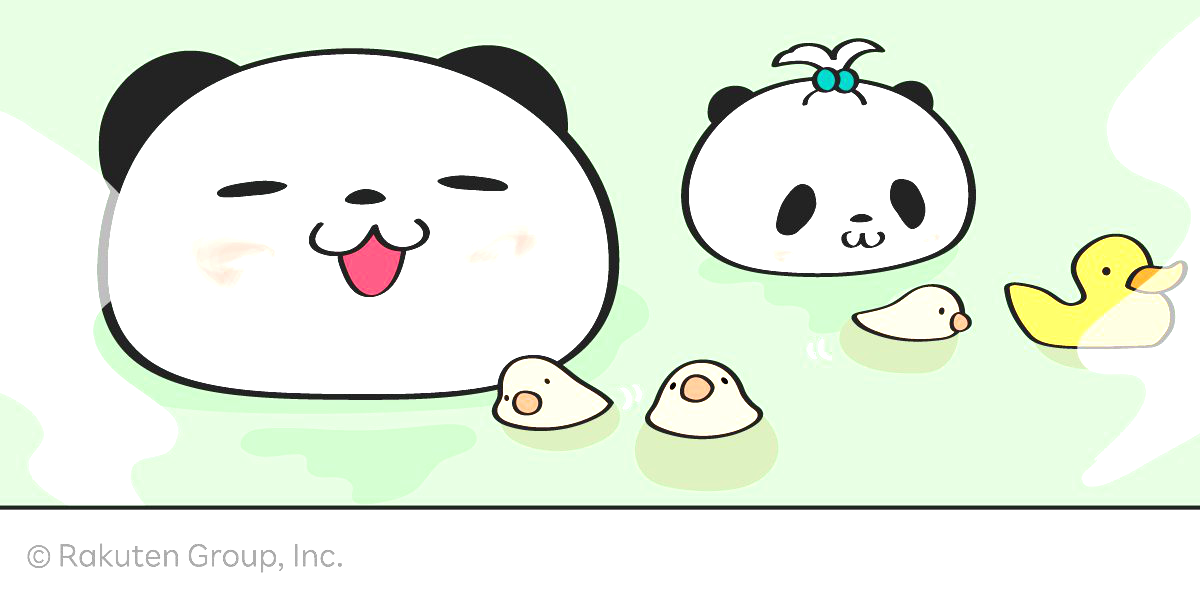

In [45]:
colorjitter = transforms.ColorJitter(brightness=1)
colorjittered_opan = colorjitter(opan)
colorjittered_opan

#### コントラスト

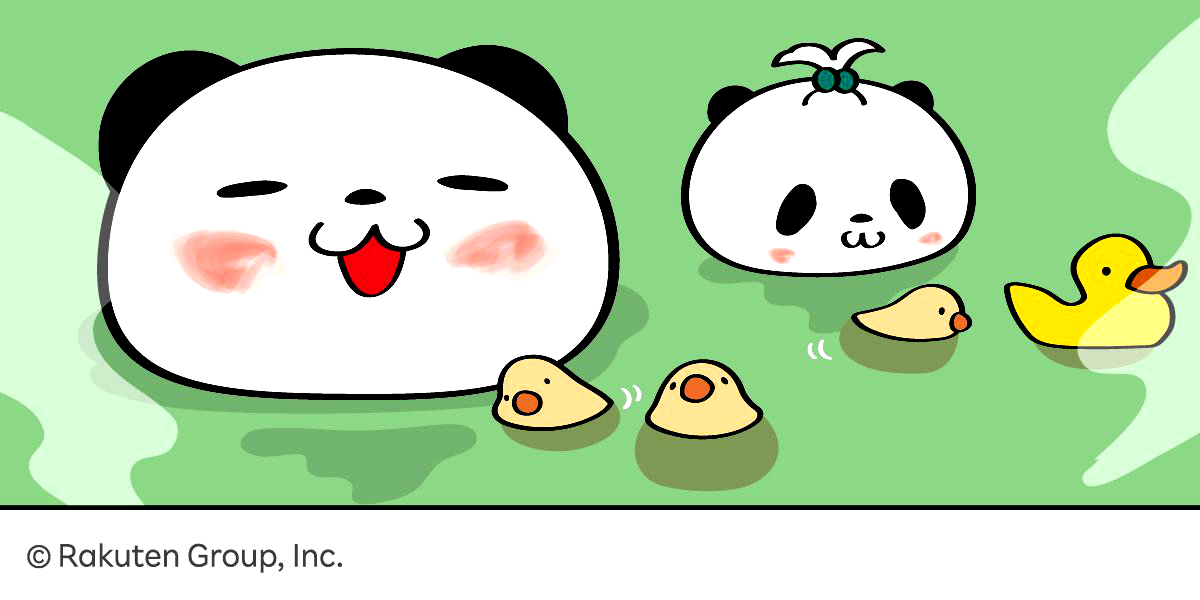

In [46]:
colorjitter = transforms.ColorJitter(contrast=1)
colorjittered_opan = colorjitter(opan)
colorjittered_opan

#### 彩度

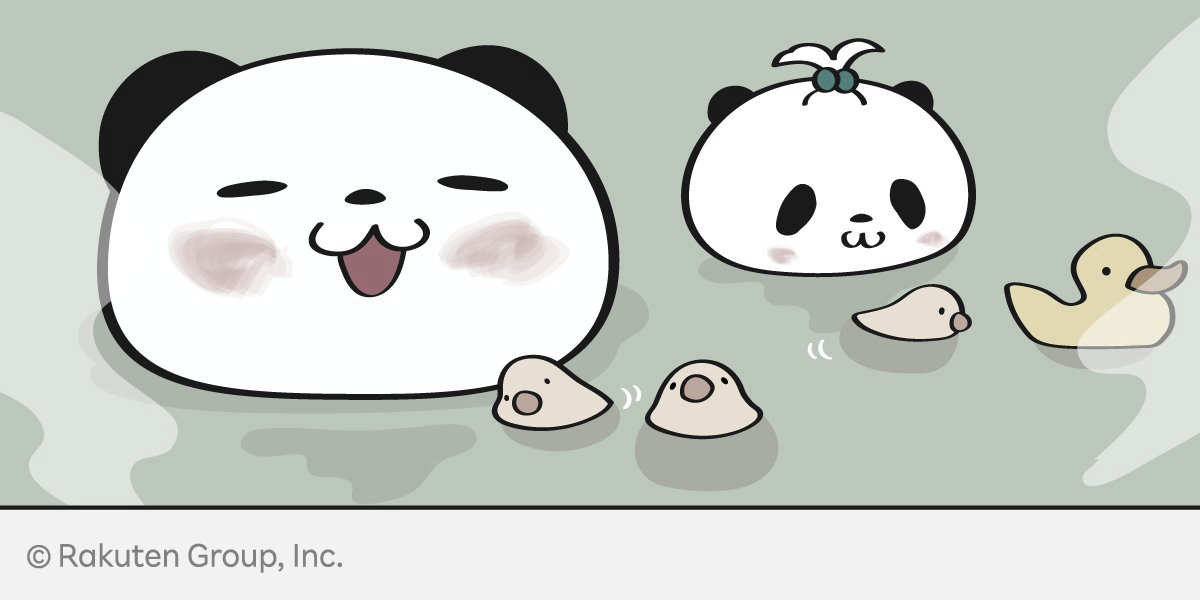

In [50]:
colorjitter = transforms.ColorJitter(saturation=1)
colorjittered_opan = colorjitter(opan)
colorjittered_opan

#### 明るさ、コントラスト、彩度

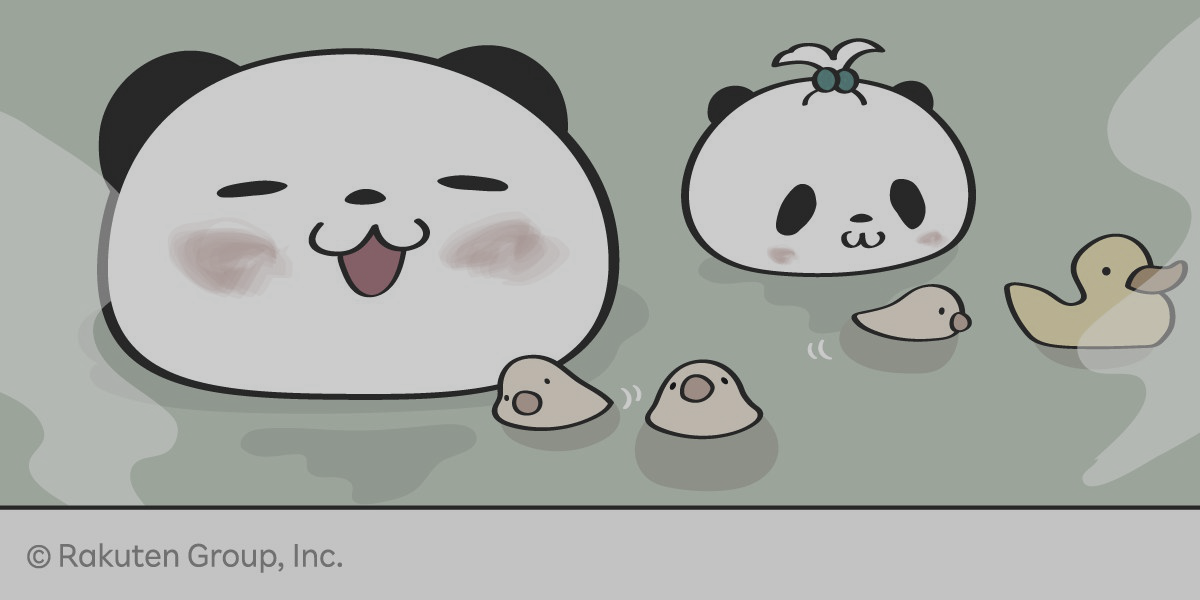

In [54]:
colorjitter = transforms.ColorJitter(brightness=1, contrast=1, saturation=1)
colorjittered_opan = colorjitter(opan)
colorjittered_opan

### ノーマライズ  
これは、データオーグメンテーションではない

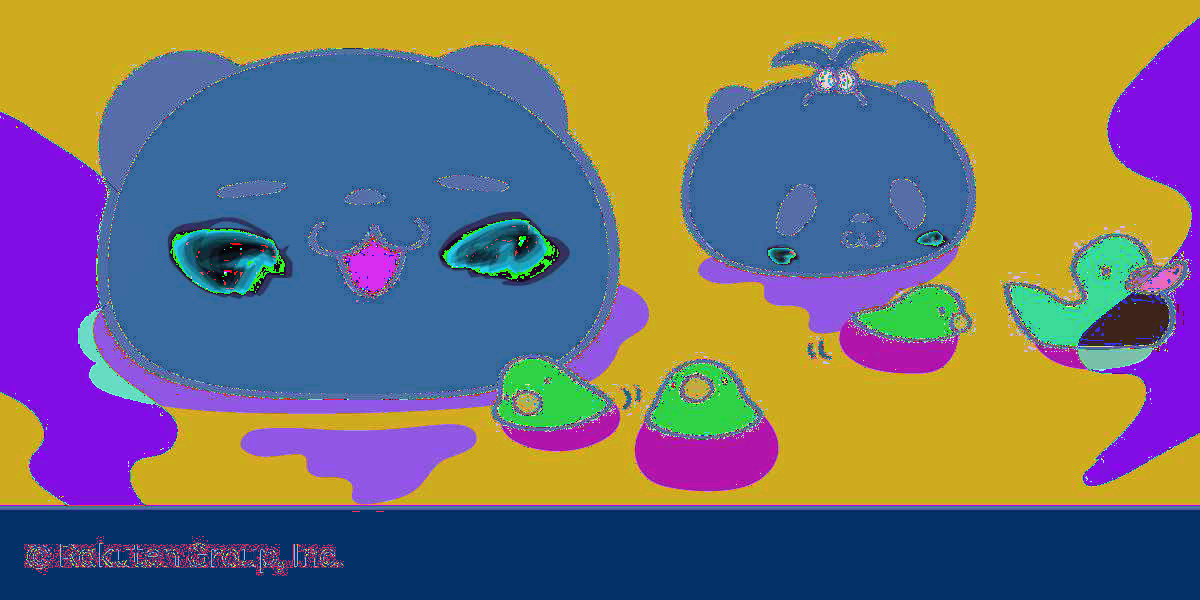

In [56]:
opan_transform =transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                    transforms.ToPILImage()
                                    ])

opan_transformed_opan = opan_transform(opan)
opan_transformed_opan

### **（重要）** ノーマライズ ＋ カラージッター
ColorJitter の後に Normalize を行う必要がある

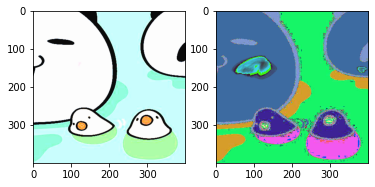

In [57]:
opan_transforms = [
                   transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.CenterCrop(400),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # 順番を入れ替える
                                    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1), # 順番を入れ替える
                                    transforms.ToPILImage()
                                    ]),
                   transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.CenterCrop(400),
                                    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1), # 順番を入れ替える
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # 順番を入れ替える
                                    transforms.ToPILImage()
                                    ])
                ]
fig = plt.figure()
X, Y  = 1, 2
for i, opan_transform in enumerate(opan_transforms):
    fig.add_subplot(X, Y, (i+1))
    plt.imshow(opan_transform(opan))
plt.show()

## 切り取り(Geometric Distortions)

### センタークロップ

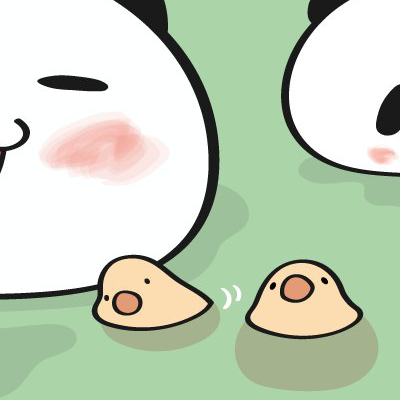

In [59]:
centercrop = transforms.CenterCrop(400) #(300, 200)タプルでも可
centercroped_opan = centercrop(opan)
centercroped_opan

### マルチクロップ（5か10）
画像認識でしか用いない？

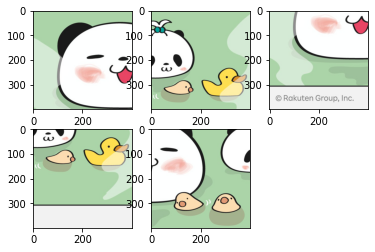

In [60]:
fivecrop = transforms.FiveCrop(400)
fivecropped_opans = fivecrop(opan)

# https://qiita.com/Ksandesu/items/5347b22a28022457fe54
fig = plt.figure()
X, Y  = 2, 3
for i, fivecropped_opan in enumerate(fivecropped_opans):
    fig.add_subplot(X, Y, (i+1))
    plt.imshow(fivecropped_opan)

plt.show()

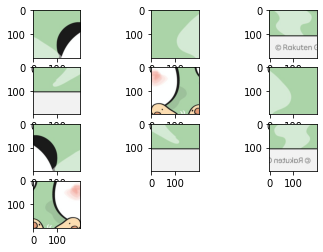

In [61]:
tencrop = transforms.TenCrop(200)
tencropped_opans = tencrop(opan)

# https://qiita.com/Ksandesu/items/5347b22a28022457fe54
fig = plt.figure()
X, Y  = 4, 3
for i, fivecropped_opan in enumerate(tencropped_opans):
    fig.add_subplot(X, Y, (i+1))
    plt.imshow(fivecropped_opan)

plt.show()

### ランダムクロップ

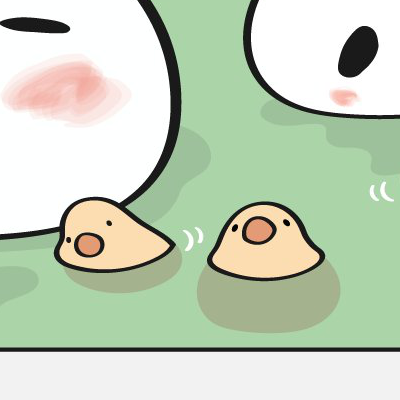

In [62]:
randomcrop = transforms.RandomCrop(400)
randomcropped_opan = randomcrop(opan)
randomcropped_opan

## リサイズ
事前学習済みのネットワークに入れる場合などに

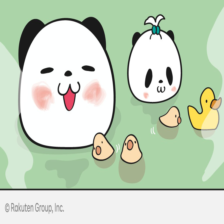

In [63]:
resize = transforms.Resize((224,224))
resized_opan = resize(opan)
resized_opan

## 回転・反転(Geometric Distortions)

### 水平反転

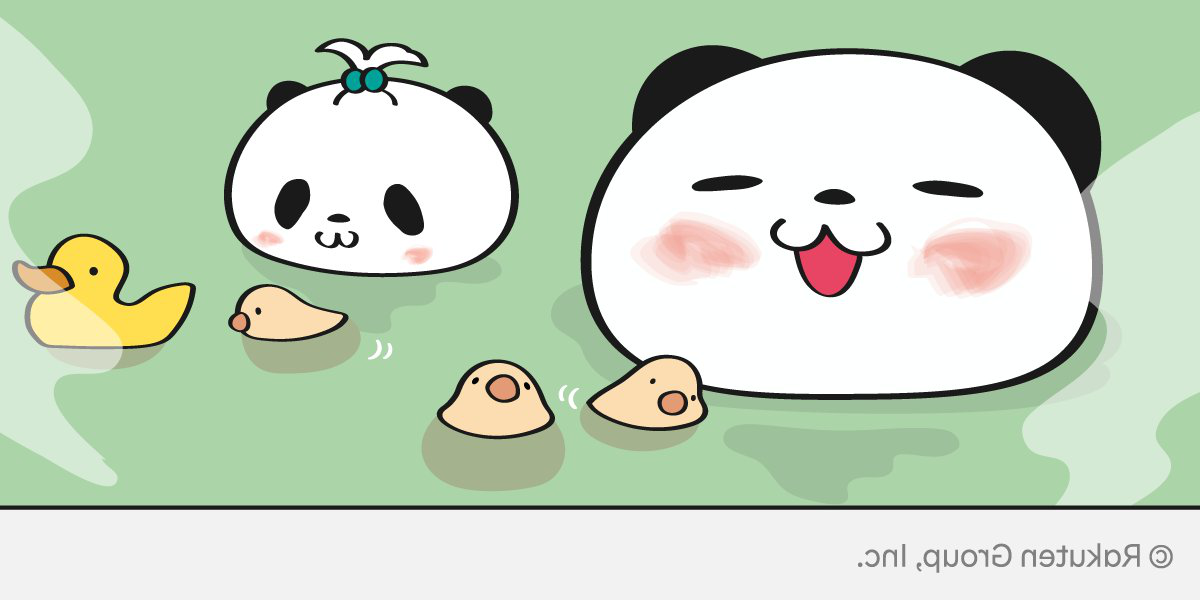

In [64]:
randomhorizontalflip = transforms.RandomHorizontalFlip(p=0.5)
randomhorizontalflipped_opan = randomhorizontalflip(opan)
randomhorizontalflipped_opan

### 垂直反転

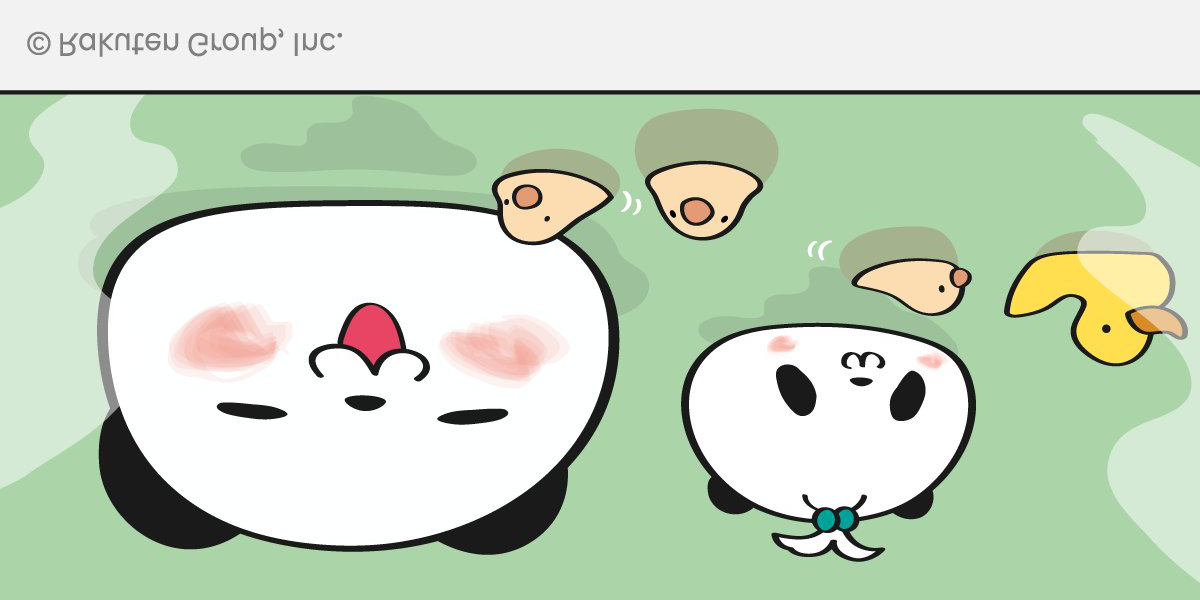

In [72]:
randomverticalflip = transforms.RandomVerticalFlip(p=0.5)
randomverticalflipped_opan = randomverticalflip(opan)
randomverticalflipped_opan

### 回転(Affine)

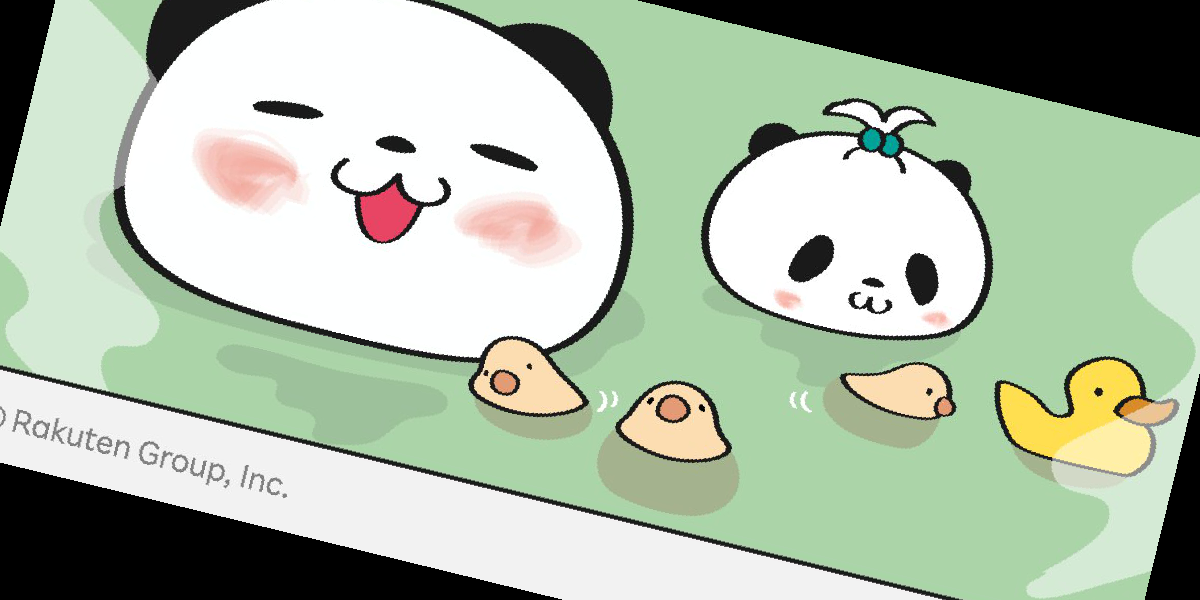

In [75]:
randomaffine = transforms.RandomAffine(degrees=30)
randomaffined_opan = randomaffine(opan)
randomaffined_opan